In [1]:
from __future__ import division, print_function, absolute_import

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import statsmodels.api as sm

In [4]:
key1='SLdF'
key2='UhTDAT'
key3='sz4VoXLDdx'
key = key1 + key2 + key3
quandl.ApiConfig.api_key = key
frequency='monthly'
start='2007-12-31'
end = '2017-05-31'
data = quandl.get(['WIKI/AAPL', 'WIKI/NDAQ'], collapse=frequency, trim_start=start, trim_end=end)
data.head()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/NDAQ - Low,WIKI/NDAQ - Close,WIKI/NDAQ - Volume,WIKI/NDAQ - Ex-Dividend,WIKI/NDAQ - Split Ratio,WIKI/NDAQ - Adj. Open,WIKI/NDAQ - Adj. High,WIKI/NDAQ - Adj. Low,WIKI/NDAQ - Adj. Close,WIKI/NDAQ - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,199.50,200.50,197.75,198.08,19261900.0,0.0,1.0,25.638531,25.767044,25.413631,...,49.26,49.49,1449800.0,0.0,1.0,44.879825,45.206553,44.707384,44.916128,1449800.0
2008-01-31,129.45,136.65,129.40,135.36,48059800.0,0.0,1.0,16.636129,17.561430,16.629704,...,41.45,46.27,3525200.0,0.0,1.0,38.118355,42.202464,37.619186,41.993721,3525200.0
2008-02-29,129.75,130.21,124.80,125.02,44838600.0,0.0,1.0,16.674683,16.733800,16.038539,...,40.75,41.51,5633800.0,0.0,1.0,38.653827,39.025934,36.983880,37.673640,5633800.0
2008-03-31,143.27,145.71,142.52,143.50,27430900.0,0.0,1.0,18.412192,18.725766,18.315806,...,38.08,38.66,2127500.0,0.0,1.0,35.096114,35.713268,34.560641,35.087038,2127500.0
2008-04-30,176.26,180.00,172.92,173.95,40697300.0,0.0,1.0,22.651867,23.132509,22.222630,...,36.20,36.45,2941500.0,0.0,1.0,34.678627,34.678627,32.854391,33.081286,2941500.0


In [6]:
data.describe()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/NDAQ - Low,WIKI/NDAQ - Close,WIKI/NDAQ - Volume,WIKI/NDAQ - Ex-Dividend,WIKI/NDAQ - Split Ratio,WIKI/NDAQ - Adj. Open,WIKI/NDAQ - Adj. High,WIKI/NDAQ - Adj. Low,WIKI/NDAQ - Adj. Close,WIKI/NDAQ - Adj. Volume
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,114.0,114.0,114.000000,114.000000,114.000000,...,114.000000,114.000000,1.140000e+02,114.0,114.0,114.000000,114.000000,114.000000,114.000000,1.140000e+02
mean,270.682761,273.196666,267.916329,270.178670,2.729450e+07,0.0,1.0,65.539889,66.048393,64.913010,...,36.114600,36.548947,1.951090e+06,0.0,1.0,34.403284,34.798806,34.007861,34.413595,1.951090e+06
std,178.558093,180.102301,176.910085,178.507795,1.687421e+07,0.0,0.0,37.432821,37.561552,37.134394,...,16.280077,16.415478,1.158745e+06,0.0,0.0,16.500981,16.601361,16.421684,16.556152,1.158745e+06
min,85.970000,87.740000,85.340000,85.350000,6.023900e+06,0.0,1.0,11.048343,11.275813,10.967379,...,17.770000,17.780000,2.358000e+05,0.0,1.0,16.336438,16.409044,16.127694,16.136770,2.358000e+05
25%,118.092500,119.402500,117.075000,117.445000,1.511132e+07,0.0,1.0,31.532260,31.860212,31.198686,...,23.110000,23.177500,1.123913e+06,0.0,1.0,21.366382,21.529992,21.046777,21.096667,1.123913e+06
50%,191.778000,193.170000,186.723350,188.625000,2.155055e+07,0.0,1.0,61.399595,61.845402,60.851646,...,30.915000,31.560000,1.659300e+06,0.0,1.0,28.750954,29.588110,28.420195,29.188881,1.659300e+06
75%,403.237500,408.567500,402.880000,404.945000,3.632489e+07,0.0,1.0,96.811955,97.012962,96.204859,...,48.332500,48.462500,2.532175e+06,0.0,1.0,46.082361,46.164043,45.375952,45.435271,2.532175e+06
max,678.750000,681.110000,666.750000,667.105000,8.374546e+07,0.0,1.0,153.347799,153.546991,151.764225,...,71.050000,71.210000,7.057200e+06,0.0,1.0,70.126121,70.278826,69.643376,70.057157,7.057200e+06


In [7]:
data = data[['WIKI/AAPL - Adj. Close', 'WIKI/NDAQ - Adj. Close']]
data.head()

,WIKI/AAPL - Adj. Close,WIKI/NDAQ - Adj. Close
Date,,
2007-12-31,25.456041,44.916128
2008-01-31,17.395647,41.993721
2008-02-29,16.066812,37.673640
2008-03-31,18.441750,35.087038
2008-04-30,22.354999,33.081286


In [8]:
np.log(data/data.shift(1)).head()

,WIKI/AAPL - Adj. Close,WIKI/NDAQ - Adj. Close
Date,,
2007-12-31,NaN,NaN
2008-01-31,-0.380733,-0.067277
2008-02-29,-0.079464,-0.108559
2008-03-31,0.137861,-0.071129
2008-04-30,0.192433,-0.058864


In [9]:
data.rename(columns={'WIKI/AAPL - Adj. Close': 'Apple', 'WIKI/NDAQ - Adj. Close': 'Nasdaq'}, inplace=True)

In [10]:
data_log = np.log(data/data.shift(1))
data_log.head()

,Apple,Nasdaq
Date,,
2007-12-31,NaN,NaN
2008-01-31,-0.380733,-0.067277
2008-02-29,-0.079464,-0.108559
2008-03-31,0.137861,-0.071129
2008-04-30,0.192433,-0.058864


In [11]:
data_df = sm.add_constant(data_log)
data_df.head()

/home/wgiersche/workspace/cfds/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Apple,Nasdaq
Date,,,
2007-12-31,1.0,NaN,NaN
2008-01-31,1.0,-0.380733,-0.067277
2008-02-29,1.0,-0.079464,-0.108559
2008-03-31,1.0,0.137861,-0.071129
2008-04-30,1.0,0.192433,-0.058864


In [13]:
model = sm.OLS(data_df['Apple'], data_df['Nasdaq'], missing='drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Apple   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     7.302
Date:                Mon, 15 Apr 2019   Prob (F-statistic):            0.00796
Time:                        22:36:00   Log-Likelihood:                 109.91
No. Observations:                 113   AIC:                            -217.8
Df Residuals:                     112   BIC:                            -215.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Nasdaq         0.2923      0.108      2.702      0.0

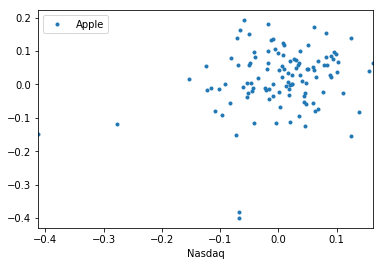

In [14]:
data_df.plot(y='Apple', x='Nasdaq', style='.')

In [34]:
frequency="monthly"
start="2007-12-31"
end="2017-12-31"
data = quandl.get(['WIKI/AAPL', 'WIKI/NDAQ'], collapse=frequency, trim_start=start, trim_end=end)
data = data[['WIKI/AAPL - Adj. Close', 'WIKI/NDAQ - Adj. Close']]
data.rename(columns={'WIKI/AAPL - Adj. Close': 'Apple', 'WIKI/NDAQ - Adj. Close': 'Nasdaq'}, inplace=True)
data.head()

,Apple,Nasdaq
Date,,
2007-12-31,25.456041,44.916128
2008-01-31,17.395647,41.993721
2008-02-29,16.066812,37.673640
2008-03-31,18.441750,35.087038
2008-04-30,22.354999,33.081286


In [30]:
tb3ms = pd.read_csv('TB3MS.csv')

In [36]:
ir_3m = tb3ms.rename(columns={'DATE': 'Date', 'TB3MS': 'ir_3m'})
ir_3m.head()

,Date,ir_3m
0,2008-01-01,2.75
1,2008-02-01,2.12
2,2008-03-01,1.26
3,2008-04-01,1.29
4,2008-05-01,1.73


In [38]:
ir_3m["Date"] = pd.to_datetime(ir_3m['Date']) - pd.tseries.offsets.MonthEnd()
ir_3m.head()

,Date,ir_3m
0,2007-12-31,2.75
1,2008-01-31,2.12
2,2008-02-29,1.26
3,2008-03-31,1.29
4,2008-04-30,1.73


In [39]:
ir_3m = ir_3m.set_index('Date')
ir_3m.head()

,ir_3m
Date,
2007-12-31,2.75
2008-01-31,2.12
2008-02-29,1.26
2008-03-31,1.29
2008-04-30,1.73


In [40]:
ir_3m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2007-12-31 to 2017-12-31
Data columns (total 1 columns):
ir_3m    121 non-null float64
dtypes: float64(1)
memory usage: 1.9 KB


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2007-12-31 to 2017-12-31
Data columns (total 2 columns):
Apple     121 non-null float64
Nasdaq    121 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


In [42]:
stocks_data = pd.concat([data, ir_3m], axis=1)
stocks_data.head()

,Apple,Nasdaq,ir_3m
Date,,,
2007-12-31,25.456041,44.916128,2.75
2008-01-31,17.395647,41.993721,2.12
2008-02-29,16.066812,37.673640,1.26
2008-03-31,18.441750,35.087038,1.29
2008-04-30,22.354999,33.081286,1.73


In [45]:
stocks_data['log_ret_Apple'] = 100* np.log(stocks_data['Apple']).diff()
stocks_data['log_ret_Nasdaq'] = 100* np.log(stocks_data['Nasdaq']).diff()
stocks_data.dropna(inplace=True)
stocks_data.head()

,Apple,Nasdaq,ir_3m,log_ret_Apple,log_ret_Nasdaq
Date,,,,,
2008-01-31,17.395647,41.993721,2.12,-38.073309,-6.727683
2008-02-29,16.066812,37.673640,1.26,-7.946417,-10.855944
2008-03-31,18.441750,35.087038,1.29,13.786131,-7.112889
2008-04-30,22.354999,33.081286,1.73,19.243287,-5.886402
2008-05-31,24.257006,31.792523,1.86,8.165549,-3.973662


#### Monthly interest rate from 3-month interest rate
$$
i_m = log((1+i_3) \cdot \frac{91}{365.25})^{\frac{30.4375}{91}})
$$

In [50]:
stocks_data['ir'] = np.log((1+stocks_data['ir_3m']*91/365.25)**(20.4375/91))
stocks_data.head()

,Apple,Nasdaq,ir_3m,log_ret_Apple,log_ret_Nasdaq,ir
Date,,,,,,
2008-01-31,17.395647,41.993721,2.12,-38.073309,-6.727683,0.095244
2008-02-29,16.066812,37.673640,1.26,-7.946417,-10.855944,0.061316
2008-03-31,18.441750,35.087038,1.29,13.786131,-7.112889,0.062590
2008-04-30,22.354999,33.081286,1.73,19.243287,-5.886402,0.080489
2008-05-31,24.257006,31.792523,1.86,8.165549,-3.973662,0.085516


#### Excess return

In [52]:
stocks_data['ex_ret_Apple'] = stocks_data['log_ret_Apple'] - stocks_data['ir']
stocks_data['ex_ret_Nasdaq'] = stocks_data['log_ret_Nasdaq'] - stocks_data['ir']
stocks_data.head()

,Apple,Nasdaq,ir_3m,log_ret_Apple,log_ret_Nasdaq,ir,ex_ret_Apple,ex_ret_Nasdaq
Date,,,,,,,,
2008-01-31,17.395647,41.993721,2.12,-38.073309,-6.727683,0.095244,-38.168553,-6.822926
2008-02-29,16.066812,37.673640,1.26,-7.946417,-10.855944,0.061316,-8.007733,-10.917260
2008-03-31,18.441750,35.087038,1.29,13.786131,-7.112889,0.062590,13.723541,-7.175479
2008-04-30,22.354999,33.081286,1.73,19.243287,-5.886402,0.080489,19.162797,-5.966891
2008-05-31,24.257006,31.792523,1.86,8.165549,-3.973662,0.085516,8.080033,-4.059178


In [53]:
stocks_mean = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].mean()
stocks_mean

ex_ret_Apple     1.563161
ex_ret_Nasdaq    0.431905
dtype: float64

In [55]:
stocks_std = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].std()
stocks_std

ex_ret_Apple     9.193902
ex_ret_Nasdaq    7.879735
dtype: float64

In [56]:
stocks_kurt = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].kurt()
stocks_kurt

ex_ret_Apple     4.966123
ex_ret_Nasdaq    6.463692
dtype: float64

In [57]:
stocks_max = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].max()
stocks_max

ex_ret_Apple     19.162797
ex_ret_Nasdaq    16.255581
dtype: float64

In [58]:
stocks_min = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].min()
stocks_min

ex_ret_Apple    -40.016507
ex_ret_Nasdaq   -41.197235
dtype: float64

In [59]:
stocks_summary = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']].describe()
stocks_summary

,ex_ret_Apple,ex_ret_Nasdaq
count,120.000000,120.000000
mean,1.563161,0.431905
std,9.193902,7.879735
min,-40.016507,-41.197235
25%,-2.539241,-4.257481
50%,2.279256,1.269124
75%,7.076867,5.079753
max,19.162797,16.255581


### Lower Partial moment of degree $q$

$$ 
LPM_{qp}(\Psi)=\frac{1}{T-1}\sum_{t=1}^{T}\text{max}[(\Psi-r_{pt}), 0]^q
$$

In [118]:
def lpm(s, q=2, baseline=None):
    if baseline is None:
        baseline = s.mean()
        
    return np.sqrt(np.sum(
        np.where(
            s < baseline,
            np.abs(s - baseline)**q
            , 0
        ) / (s.shape[0] - 1)))

In [119]:
lpm(stocks_data['ex_ret_Nasdaq']), lpm(stocks_data['ex_ret_Apple']) 

(6.281613849854372, 7.314755613664661)

#### Shortfall risk
Shortfall risk is LPM(0,0)

In [159]:
nasdaq = stocks_data['ex_ret_Nasdaq']
apple = stocks_data['ex_ret_Apple']

In [167]:
lpm(stocks_data['ex_ret_Apple'], 0, 0), lpm(stocks_data['ex_ret_Nasdaq'], 0, 0)

(0.6284568268332179, 0.6482037235521644)

In [168]:
A_N = stocks_data[['ex_ret_Apple','ex_ret_Nasdaq']]

In [169]:
np.sqrt(A_N.apply(lambda x: np.where(x<0, 1, 0)).sum()/(A_N.shape[0]-1))

ex_ret_Apple     0.628457
ex_ret_Nasdaq    0.648204
dtype: float64

In [170]:
lpm(apple, 2, 0), lpm(nasdaq, 2, 0)

(6.636324207758107, 6.087151154478543)

#### Expected shortfall

In [171]:
esf = np.abs(A_N.apply(lambda x:np.where(x<0, x, 0)).sum() / \
             (np.count_nonzero(A_N.apply(lambda x: np.where(x<0, 1, 0)))))
esf

ex_ret_Apple     3.30280
ex_ret_Nasdaq    3.30254
dtype: float64

#### Value at Risk
The historical Value at Risk at 95% confidence level is the 5% quantile or the returns (???)

In [172]:
VaR = np.abs(A_N.apply(np.percentile, q=0.05))
VaR

ex_ret_Apple     39.906554
ex_ret_Nasdaq    40.399746
dtype: float64

#### Sharpe Ratio

$$
 S_{xp} = \frac{\bar{r}_{xbp}}{\sigma_{xbp}}
$$

In [173]:
SR = A_N.mean()/A_N.std()
SR

ex_ret_Apple     0.170021
ex_ret_Nasdaq    0.054812
dtype: float64

#### Information Ratio
The mean excess divided by the std of excess returns.

In [177]:
stocks_data['ex_Nasdaq_Apple'] = apple-nasdaq
exna=stocks_data['ex_Nasdaq_Apple']
Apple_info_ratio=exna.mean()/exna.std()
Apple_info_ratio

0.10609518307980088

#### Treynor Ratio
$$
T_{xp} = \frac{\bar{r}_{xp}}{\beta_p}
$$

In [181]:
import scipy.stats as stats

In [185]:
beta, alpha, rval, pval, stderr = stats.linregress(nasdaq, apple)

In [186]:
apple.mean()/beta

5.895482657610708

#### Burke Ratio
$$
\text{Burke}_p = \frac{\bar{r}_{xp}}{\sqrt{DD_{2TP}}}
$$

In [298]:
def drawdown(series):
    ms = (0., 0., 0.)
    s = 0.
    array = series
    start = array.iloc[0]
    for i in range(len(array)-1):
        d = array.iloc[i+1] - array.iloc[i]
        if d <= 0:
            s-=d
        else:
            if s/start>ms[0]:
                ms = (s/start, s, start)
            start=array[i+1]
            s = 0.
    return ms[0]*100

In [299]:
dd2={}
for y in ["%s" % (2000 +yy) for yy in range(8, 18)]:
    dd2[y] = stocks_data.loc[y+'-01-29':y+'-12-31', ['Apple', 'Nasdaq']].apply(drawdown)**2

In [302]:
dd2['2010']

Apple      30.255345
Nasdaq    250.095056
dtype: float64

In [304]:
pd.concat(dd2, axis=1)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Apple,249.263453,0.827731,30.255345,31.117864,13.245205,139.956000,2.914932,231.760102,195.779125,36.293278
Nasdaq,1816.413923,314.072675,250.095056,215.370776,286.706921,79.845861,12.702637,27.213188,95.035492,40.229314


In [ ]:
apple_dd_2008 = 

In [275]:
dd, _, _ = drawdown(d)
dd

0.5

In [5]:
import tensorflow as tf

In [6]:
tf.constant(1.0)

<tf.Tensor: id=0, shape=(), dtype=float32, numpy=1.0>

In [15]:
ab = tf.Variable([[1.0, 2.0]])
ab

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[1., 2.]], dtype=float32)>

In [24]:
x = tf.constant([[3.0, 2.0], [3.0, 2.0]])
x

<tf.Tensor: id=50, shape=(2, 2), dtype=float32, numpy=
array([[3., 2.],
       [3., 2.]], dtype=float32)>

In [29]:
tf.matmul(x, tf.transpose(ab))

<tf.Tensor: id=59, shape=(2, 1), dtype=float32, numpy=
array([[7.],
       [7.]], dtype=float32)>

In [303]:
apple.describe()

count    120.000000
mean       1.563161
std        9.193902
min      -40.016507
25%       -2.539241
50%        2.279256
75%        7.076867
max       19.162797
Name: ex_ret_Apple, dtype: float64